In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
# ignore Pandas complaining about Seaborn
from warnings import filterwarnings
filterwarnings('ignore', category=FutureWarning)
from scipy import stats

# Data discovery notebook

In [ ]:
df = pd.read_csv("data/merged_data_cleaned.csv")
print(df.shape)
df.head()

(1339, 44)


,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


## Types of columns

In [ ]:
df.dtypes

Unnamed: 0                 int64
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

## Numerical Data sum-op

In [ ]:
df.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1338.000000,1339.000000,1109.000000,1109.000000,1109.000000
mean,669.000000,154.182972,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,7.503376,82.089851,0.088379,0.479462,0.173393,3.556385,1750.713315,1799.347775,1775.030545
std,386.680316,129.987162,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.473464,3.500575,0.048287,2.549683,0.832121,5.312541,8669.440545,8668.805771,8668.626080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,334.500000,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,669.000000,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,1003.500000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1338.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


## Messyness of some columns

In [ ]:
df['Harvest.Year'].unique()

array(['2014', nan, '2013', '2012', 'March 2010',
       'Sept 2009 - April 2010', 'May-August', '2009/2010', '2015',
       '2011', '2016', '2015/2016', '2010', 'Fall 2009', '2017',
       '2009 / 2010', '2010-2011', '2009-2010', '2009 - 2010',
       '2013/2014', '2017 / 2018', 'mmm', 'TEST',
       'December 2009-March 2010', '2014/2015', '2011/2012',
       'January 2011', '4T/10', '2016 / 2017', '23 July 2010',
       'January Through April', '1T/2011', '4t/2010', '4T/2010',
       'August to December', 'Mayo a Julio', '47/2010', 'Abril - Julio',
       '4t/2011', 'Abril - Julio /2011', 'Spring 2011 in Colombia.',
       '3T/2011', '2016/2017', '1t/2011', '2018', '4T72010', '08/09 crop'],
      dtype=object)

In [ ]:
df[df["Species"] == "Robusta"]["Altitude"]

1311          1488
1312          3170
1313         1000m
1314          1212
1315     1200-1300
1316         3000'
1317          750m
1318          3140
1319          1000
1320      900-1300
1321          1095
1322          1000
1323          750m
1324          1367
1325          1488
1326         1000m
1327          750m
1328          1600
1329          1745
1330          1200
1331          750m
1332          750m
1333         3000'
1334           NaN
1335            40
1336    795 meters
1337           NaN
1338           NaN
Name: Altitude, dtype: object

In [ ]:
df[df["altitude_high_meters"] > 9000]["altitude_high_meters"]
# knowing that the highest altotude on the Earth is 8,846 m...

543      11000.0
896     190164.0
1040    110000.0
1144    190164.0
Name: altitude_high_meters, dtype: float64

## Class unbalances in the dataset:

In [ ]:
df['Processing.Method'].value_counts()

Washed / Wet                 815
Natural / Dry                258
Semi-washed / Semi-pulped     56
Other                         26
Pulped natural / honey        14
Name: Processing.Method, dtype: int64

In [ ]:
df['Species'].value_counts()

Arabica    1311
Robusta      28
Name: Species, dtype: int64

## NaN values for each columns

In [ ]:
np.sum(df.isna(), axis=0)

Unnamed: 0                  0
Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 359
Lot.Number               1063
Mill                      318
ICO.Number                157
Company                   209
Altitude                  226
Region                     59
Producer                  232
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   226
Processing.Method         170
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers   

In [ ]:
# We notice that if we drop the column with the max number of NaN values, 815 lines still have at least one missing value.
np.sum(np.max(df.drop(columns=["Lot.Number"]).isna(), axis=1))

798

In [ ]:
g = df.columns.to_series().groupby(df.dtypes).groups
g={k.name: list(v) for k, v in g.items()}
g

{'int64': ['Unnamed: 0',
  'Number.of.Bags',
  'Category.One.Defects',
  'Category.Two.Defects'],
 'float64': ['Aroma',
  'Flavor',
  'Aftertaste',
  'Acidity',
  'Body',
  'Balance',
  'Uniformity',
  'Clean.Cup',
  'Sweetness',
  'Cupper.Points',
  'Total.Cup.Points',
  'Moisture',
  'Quakers',
  'altitude_low_meters',
  'altitude_high_meters',
  'altitude_mean_meters'],
 'object': ['Species',
  'Owner',
  'Country.of.Origin',
  'Farm.Name',
  'Lot.Number',
  'Mill',
  'ICO.Number',
  'Company',
  'Altitude',
  'Region',
  'Producer',
  'Bag.Weight',
  'In.Country.Partner',
  'Harvest.Year',
  'Grading.Date',
  'Owner.1',
  'Variety',
  'Processing.Method',
  'Color',
  'Expiration',
  'Certification.Body',
  'Certification.Address',
  'Certification.Contact',
  'unit_of_measurement']}

In [ ]:
# We noticed that at list one line is a "test" line and does not correspond to coffee samples
df[df["ICO.Number"]=="TEST"]

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
170,170,Arabica,alexandra katona-carroll,Brazil,NaN,NaN,NaN,TEST,NaN,test,...,NaN,0,"March 21st, 2012",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,NaN,NaN,NaN


## Interaction between columns when we remove outliers

(1339, 12)
(1205, 12)


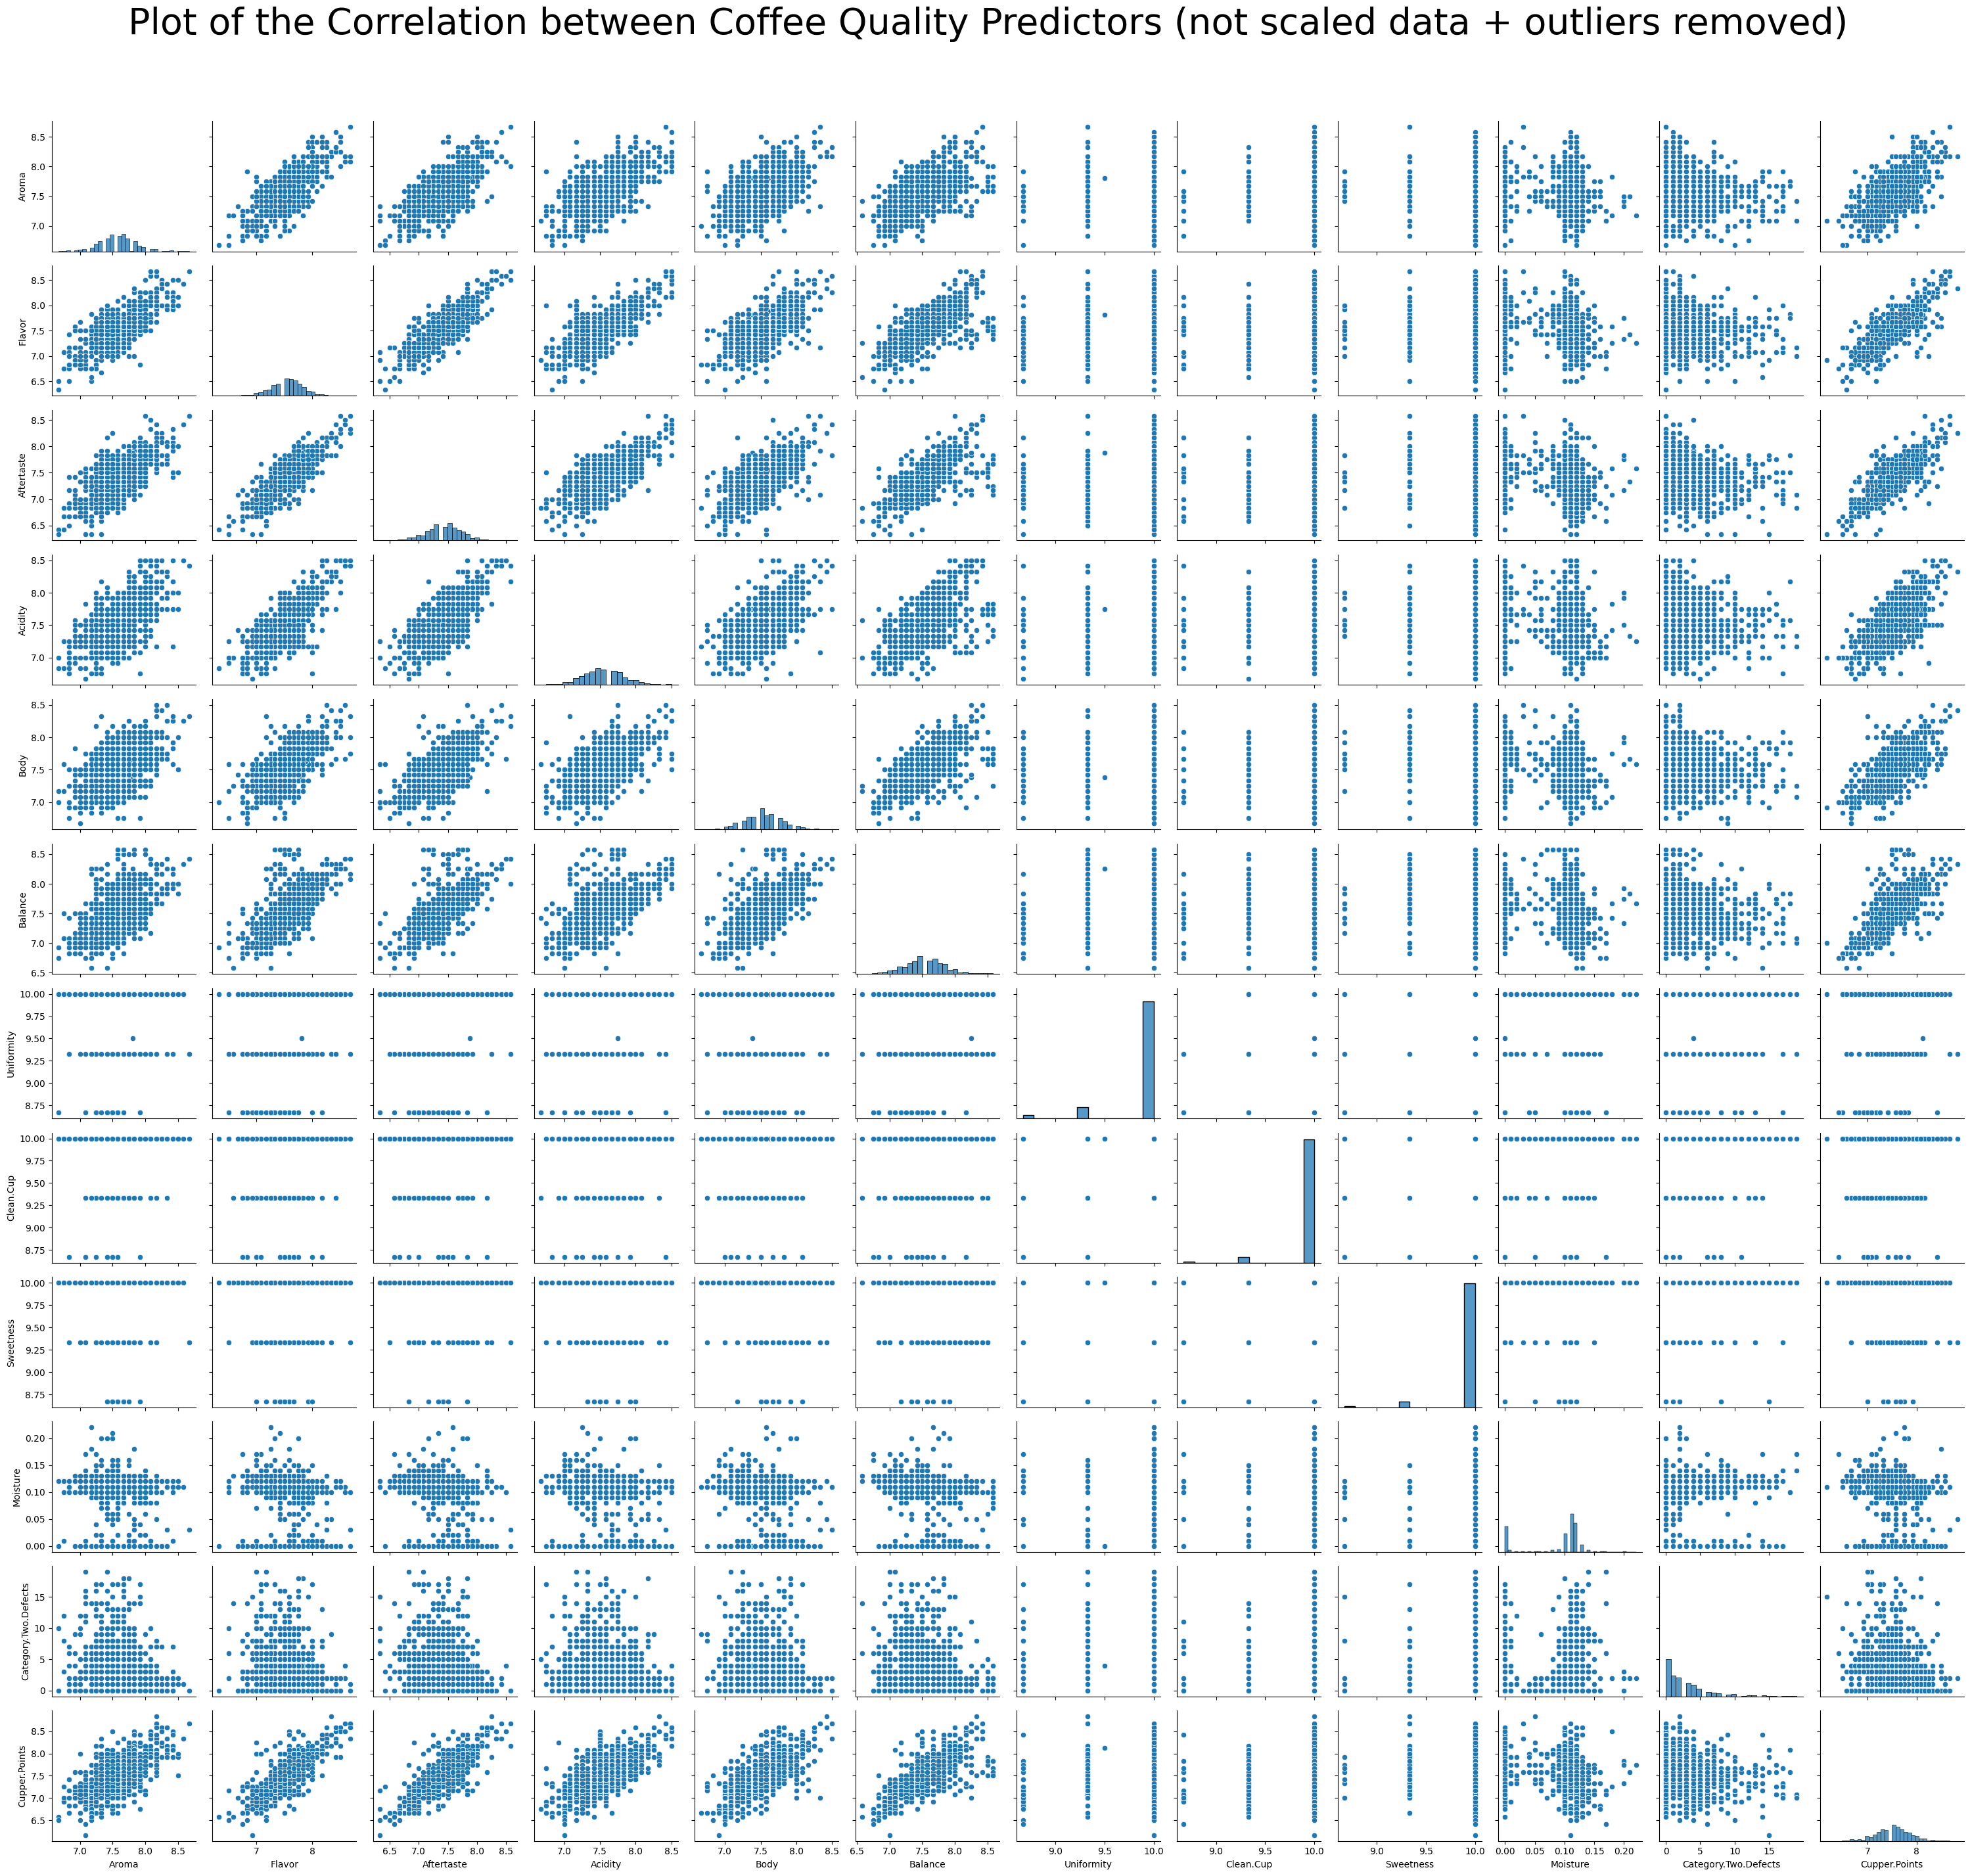

In [ ]:
from scipy.stats import zscore

quality_features = ["Aroma","Flavor","Aftertaste","Acidity",
                    "Body","Balance","Uniformity","Clean.Cup",
                    "Sweetness","Moisture","Category.Two.Defects", "Cupper.Points"]
df_quality = df[quality_features]
print(df_quality.shape)

# Removing outliers with Z-score +/- 3
print(df_quality[(np.abs(zscore(df_quality)) < 3).all(axis=1)].shape)

a = sns.pairplot(df_quality[(np.abs(zscore(df_quality)) < 3).all(axis=1)])
a.fig.suptitle("Plot of the Correlation between Coffee Quality Predictors (not scaled data + outliers removed)",fontsize=40)
a.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Many variables seems to be correlated. We notticed that 'Total.Cup.Points' was the some of all the grades. It was the value we initially wanted to predict. However, 'Cupper.Points' is highly correlated to the other grades but is not a function of them but actually reflects a global score given by coffee experts. To generate the previous plot, ~134 outliers were dropped.

## Numerical values exploration

In [ ]:
df_num = df[g['int64']+g['float64']]
df_num.shape

(1339, 20)

In [ ]:
df_num.describe()

,Unnamed: 0,Number.of.Bags,Category.One.Defects,Category.Two.Defects,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Quakers,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1338.000000,1109.000000,1109.000000,1109.000000
mean,669.000000,154.182972,0.479462,3.556385,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,7.503376,82.089851,0.088379,0.173393,1750.713315,1799.347775,1775.030545
std,386.680316,129.987162,2.549683,5.312541,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.473464,3.500575,0.048287,0.832121,8669.440545,8668.805771,8668.626080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,334.500000,14.000000,0.000000,0.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,1100.000000,1100.000000,1100.000000
50%,669.000000,175.000000,0.000000,2.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,1310.640000,1350.000000,1310.640000
75%,1003.500000,275.000000,0.000000,4.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,1600.000000,1650.000000,1600.000000
max,1338.000000,1062.000000,63.000000,55.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,11.000000,190164.000000,190164.000000,190164.000000


In [ ]:
#Number of lines which have at least one missing value.
np.sum(np.max(df_num.isna(), axis=1))

231

In [ ]:
# We drop NAN values as they don't reduce too much the number of line in the dataset
df_num.dropna(axis=0, inplace=True)
idx = df_num["Unnamed: 0"]
idx

<ipython-input-21-698ee8207081>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.dropna(axis=0, inplace=True)


0          0
1          1
2          2
3          3
4          4
        ... 
1331    1331
1332    1332
1333    1333
1335    1335
1336    1336
Name: Unnamed: 0, Length: 1108, dtype: int64

**We scale the data to be able to compare them :**

In [ ]:
scaler = StandardScaler().fit(df_num.drop(columns=["Unnamed: 0"]))
x_scaled = pd.DataFrame(scaler.transform(df_num.drop(columns=["Unnamed: 0"])), columns=df_num.drop(columns=["Unnamed: 0"]).columns)

In this plot, the outliers tend to make the data look even more correlated (then we think that the previous pairplot was a more accurate representation:


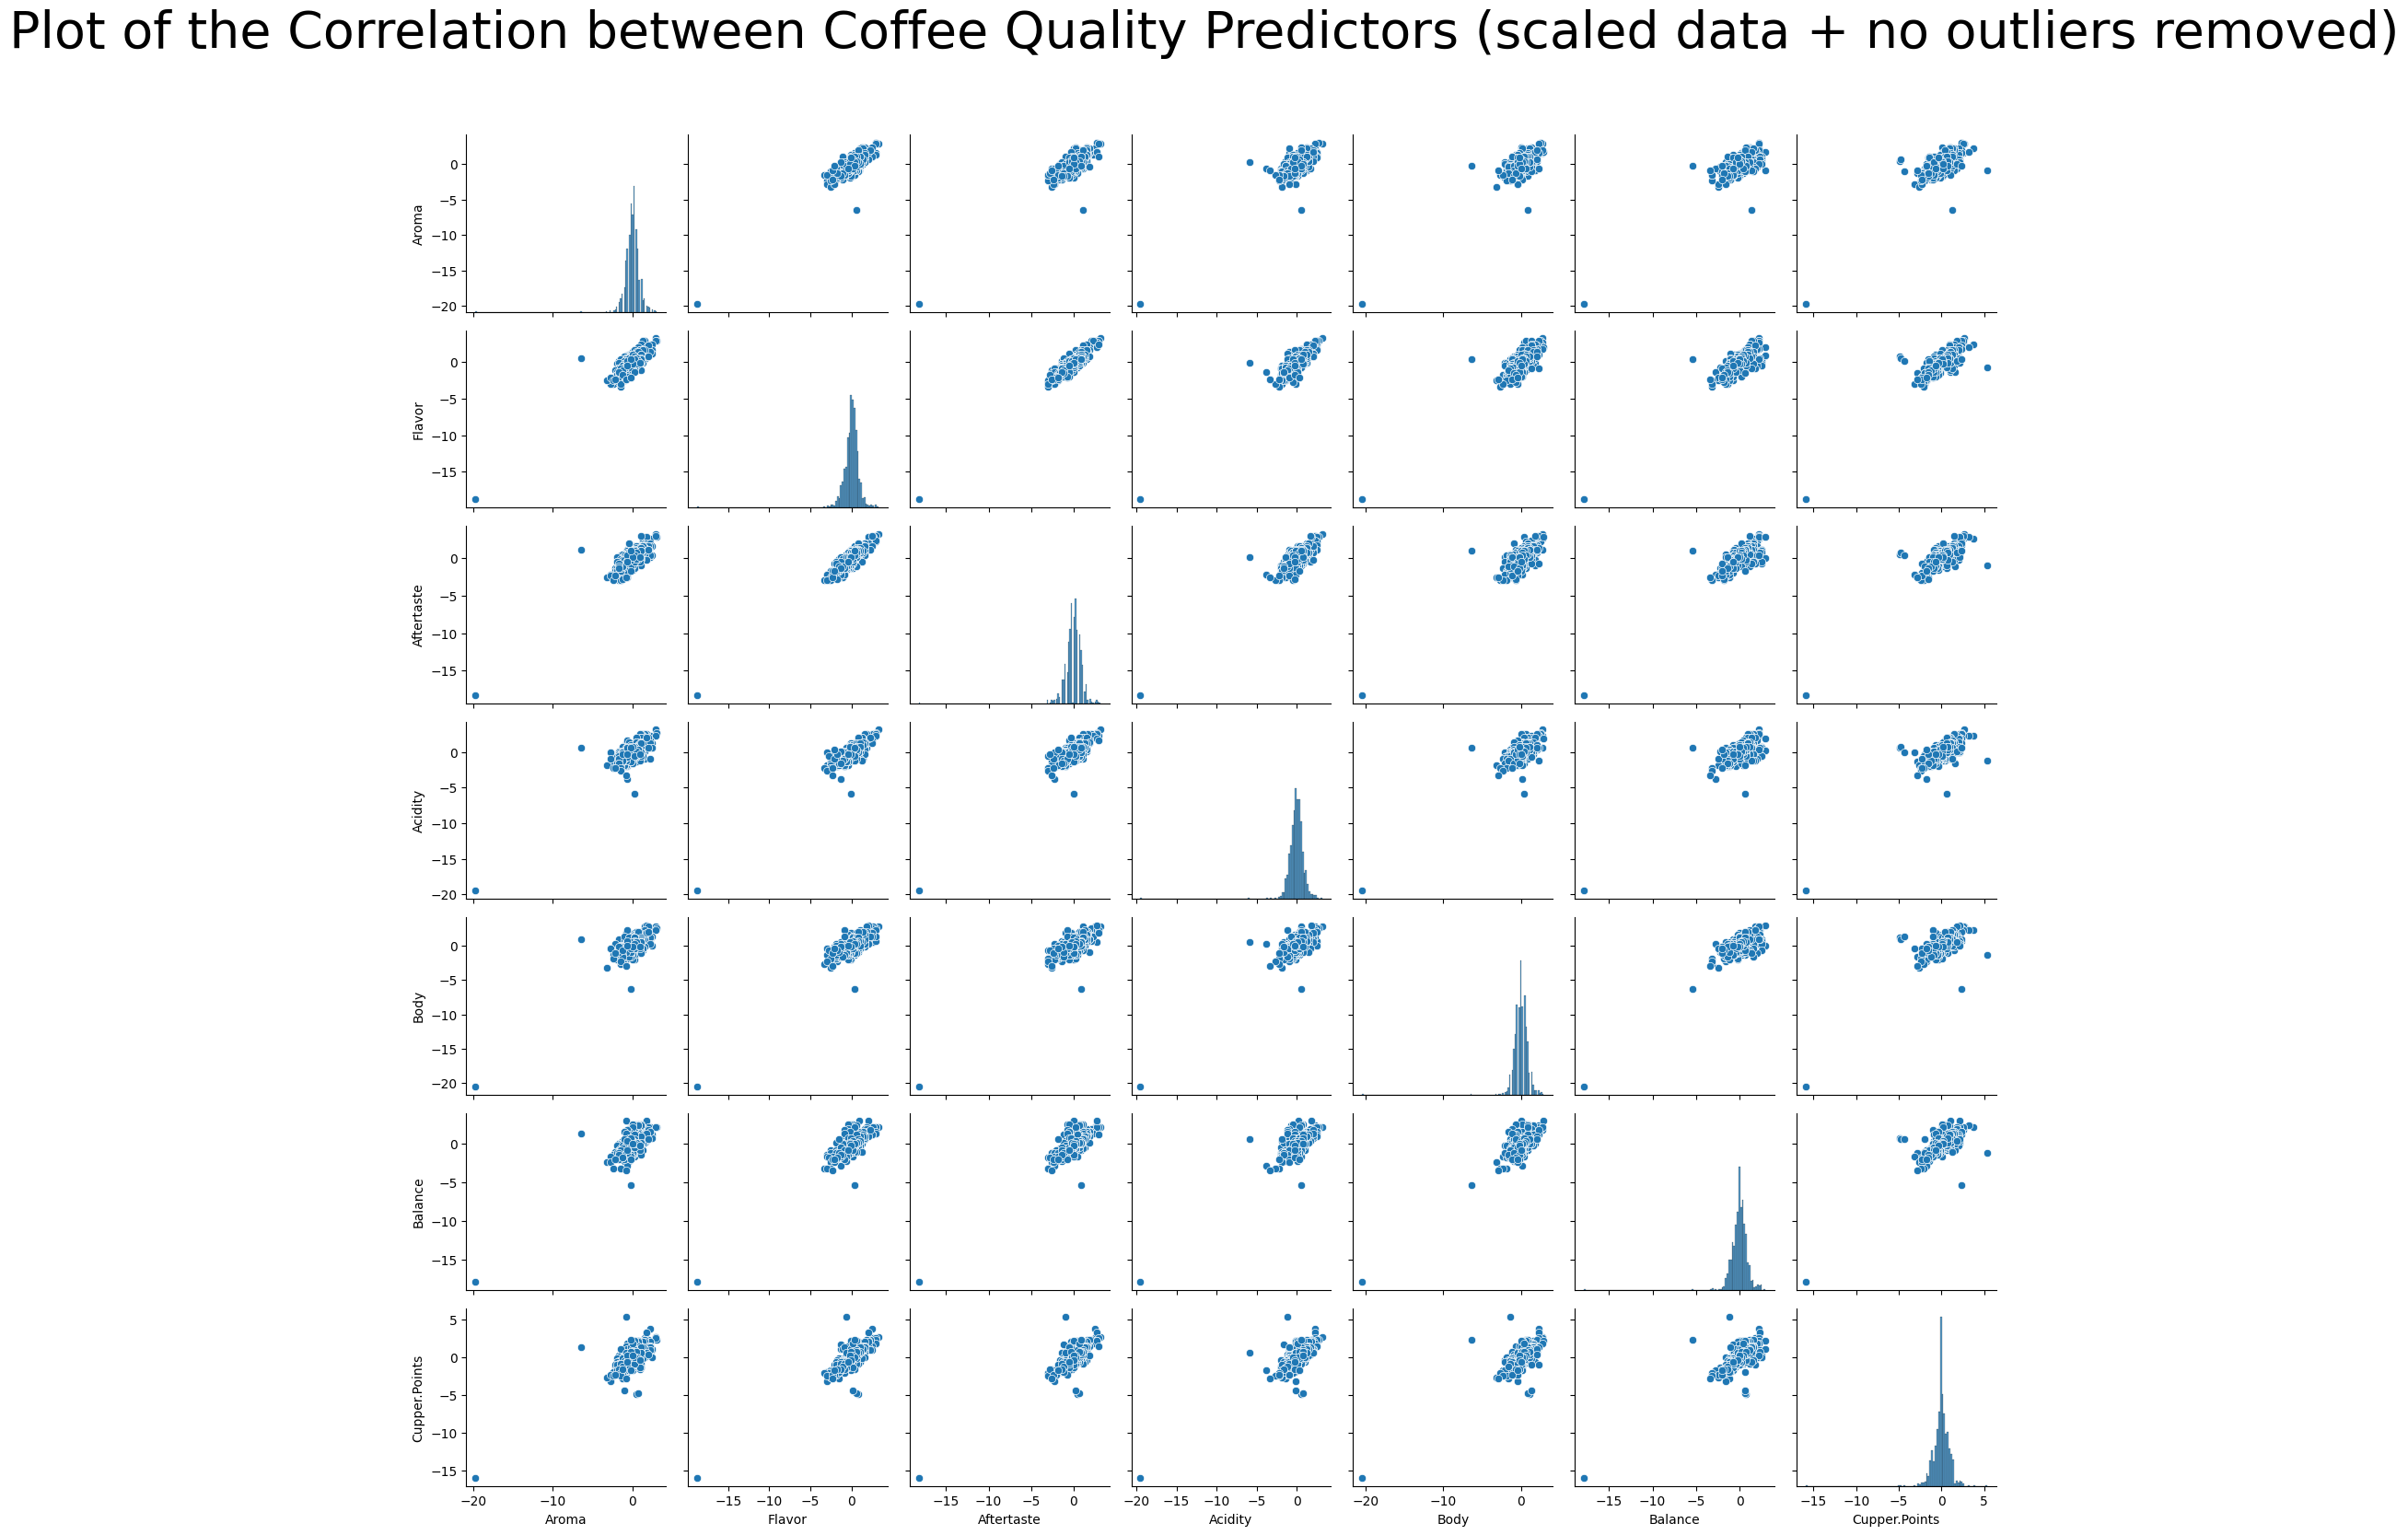

In [ ]:
a=sns.pairplot(x_scaled[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance','Cupper.Points']])

a.fig.suptitle("Plot of the Correlation between Coffee Quality Predictors (scaled data + no outliers removed)",fontsize=40)
a.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:

pca = PCA(2).fit(x_scaled )
df_pca = pd.DataFrame(pca.transform(x_scaled ), columns=["pca1", "pca2"])
df_pca

,pca1,pca2
0,-7.506414,0.140368
1,-6.889056,0.128118
2,-6.782712,0.051726
3,-6.046066,0.093115
4,-5.867355,0.115855
...,...,...
1103,0.430334,-0.238466
1104,0.423839,-0.244202
1105,0.995686,0.205980
1106,2.998923,-0.376116


In [ ]:
df_plot = df_pca.merge(df["Species"], left_index=True, right_index=True)
df_plot[df_plot["pca2"]>20]

,pca1,pca2,Species
744,1.199741,37.509521,Arabica
870,1.772752,21.492993,Arabica
952,1.852797,37.941321,Arabica


Text(0, 0.5, 'pca2')

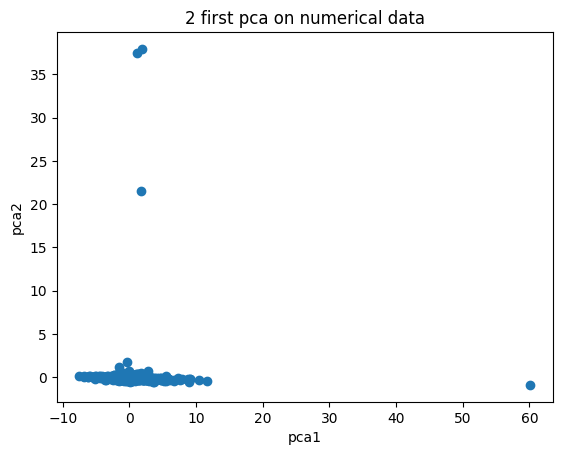

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_plot["pca1"], df_plot["pca2"])
ax.set_title("2 first pca on numerical data")
ax.set_xlabel("pca1")
ax.set_ylabel("pca2")


**We tried to remove the pca outliers lines (`[1082, 744, 870, 952, 868, 949]`) in the original dataset and relaunched the pca then : we still got similar plots where the explaines variance of the second pca component was mostly denerated by a few outliers**

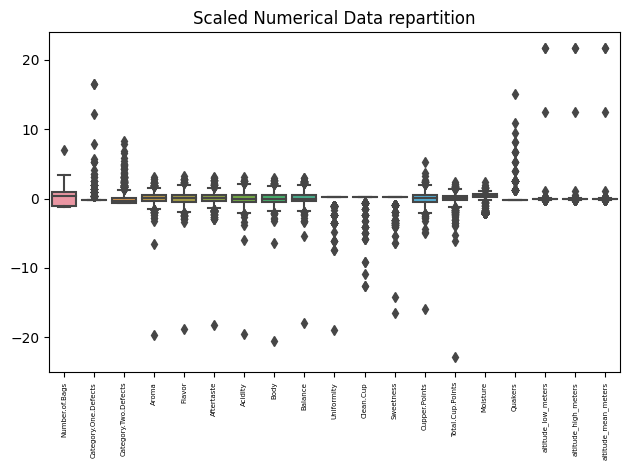

In [ ]:

fig, ax = plt.subplots()
sns.boxplot(data=pd.DataFrame(x_scaled, columns=df_num.drop(columns=["Unnamed: 0"]).columns), ax=ax)
plt.xticks(rotation=90, fontsize=5)
ax.set_title("Scaled Numerical Data repartition")
plt.tight_layout()

The previous plot shows that the predictors "Category.One_Defects", "Uniformity", "Sweetness", "Clean.Cup", and "Quakers" have very low variance (mostly just outliers).

Text(0.5, 1.0, 'Country of origin counts: class imbalances')

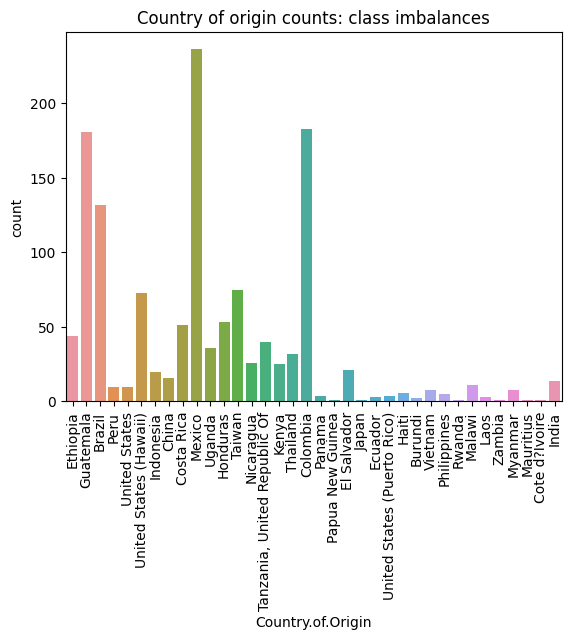

In [ ]:
sns.countplot(data=df, x='Country.of.Origin')
plt.xticks(rotation=90)
plt.title("Country of origin counts: class imbalances")


We notice that some countries are very represented whereas others are not : we might consider grouping the less represented countries in an "other" country value.

In [ ]:
df_float = df.select_dtypes(include=[np.float64])
X_float = df_float.loc[:, df_float.columns != "Total.Cup.Points"]

In [ ]:
correlation_matrix = X_float.corr()
threshold = 0.8
high_corr = {}
# Iterate through the upper triangle of the correlation matrix to avoid duplicate pairs
for i in range(len(X_float.columns)):
    for j in range(i + 1, len(X_float.columns)):  # To not include the diagonal
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) >= threshold:
            pair = (X_float.columns[j], X_float.columns[i])  # grader order
            high_corr[pair] = corr

print("The following pairs of predictor variables have correlation greater than 0.8 or less than -0.8:")
display(high_corr)

The following pairs of predictor variables have correlation greater than 0.8 or less than -0.8:


{('Flavor', 'Aroma'): 0.813259456068153,
 ('Aftertaste', 'Flavor'): 0.8956717538657448,
 ('Acidity', 'Flavor'): 0.8166883346460045,
 ('Balance', 'Aftertaste'): 0.809639129642414,
 ('altitude_high_meters', 'altitude_low_meters'): 0.9997706509705001,
 ('altitude_mean_meters', 'altitude_low_meters'): 0.9999426652972808,
 ('altitude_mean_meters', 'altitude_high_meters'): 0.9999426569000649}

From above, it is noticeable that the highest correlated predictors (outside of the altitude) are flavor, aroma, aftertaste, acidity, and balance. This could be important to note when tring to eliminate colinearity from our predictors.

## Data Preprocessing

In [ ]:
df = pd.read_csv("data/merged_data_cleaned.csv")
print(df.shape)
df.head()

(1339, 44)


,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [ ]:
# drop useless column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)
# drop outliers
g = df.columns.to_series().groupby(df.dtypes).groups
g={k.name: list(v) for k, v in g.items()}
numerical_vars = df[g['int64']+g['float64']].columns
df_idx = df[numerical_vars]
drop_idx = df_idx[(np.abs(stats.zscore(df_idx)) > 3).any(axis=1)].index
print(len(df))
df = df.drop(drop_idx)
print(len(df))


1339
1197


In [ ]:
# provide a contrast table of original values v.s. cleaned values
year_origin = pd.Series(df['Harvest.Year'].value_counts().index.values)
year_clean = df['Harvest.Year'].value_counts().index.str.extract('(20\d\d)')

df_compare = pd.concat([year_origin, year_clean], axis=1)
df_compare.columns = ['original', 'cleaned']
df_compare



,original,cleaned
0,2012,2012
1,2014,2014
2,2013,2013
3,2015,2015
4,2016,2016
5,2017,2017
6,2013/2014,2013
7,2015/2016,2015
8,2011,2011
9,2014/2015,2014


In [ ]:
# clean Harvest.Year: extract the first time where there are 4 consecutive digits as year.
# if there is no 4 consecutive digits, Harvest.Year is missing
# if it is a range, like '2013/2014', we take the beginning year 2013
df['Harvest.Year'] = df['Harvest.Year'].str.extract('(\d\d\d\d)')
